<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_2/SecondHand/2nd_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('secondhanddataset.csv')

# Cek informasi umum tentang dataset
print("Informasi dataset:")
print(data.info())

# Cek statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

# Cek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# Cek korelasi antara kolom yang berhubungan
print("\nKorelasi antar kolom:")
print(data.corr())

# Cek apakah ada kolom yang redundant (misalnya: 'on road old' dan 'on road now')
print("\nCek duplikasi kolom:")
print(data[['on road old', 'on road now']].head())

# Hapus kolom ID jika tidak diperlukan
data_cleaned = data.drop(columns=['v.id'])

# Gabungkan kolom 'on road old' dan 'on road now' jika perlu, misalnya dengan menghitung rata-rata
data_cleaned['mileage'] = data_cleaned[['on road old', 'on road now']].mean(axis=1)
data_cleaned = data_cleaned.drop(columns=['on road old', 'on road now'])

# Periksa data yang sudah dibersihkan
print("\nData setelah pembersihan:")
print(data_cleaned.head())

# Cek kembali apakah ada data yang hilang setelah pembersihan
print("\nCek missing values setelah pembersihan:")
print(data_cleaned.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB
None

Statistik Deskriptif:
              v.id    on road old  on road now        years             km  \
count  1000.000000    1000.000000    1000.0000  1000.000000    1000.000000   
mean    500.500000  601

Dari hasil pemeriksaan dan pembersihan data, berikut adalah ringkasan:

- Tidak ada nilai yang hilang (missing values) setelah pembersihan, sehingga data sudah siap untuk digunakan dalam membangun model.
- Kolom v.id telah dihapus karena hanya berfungsi sebagai ID dan tidak relevan untuk prediksi.
- Kolom on road old dan on road now digabungkan menjadi satu fitur baru mileage dengan menghitung rata-rata dari kedua kolom tersebut. Kolom yang redundan telah dihapus.
- Data yang tersisa sudah dalam format yang baik untuk digunakan dalam model.

Dengan data yang sudah dibersihkan, kita bisa melanjutkan untuk membangun model Deep Learning MLP dan menghitung matriks evaluasi (RMSE, MSE, R-Squared).

**PyTorch**

Epoch [10/100], Loss: 0.0054
Epoch [20/100], Loss: 0.0027
Epoch [30/100], Loss: 0.0018
Epoch [40/100], Loss: 0.0012
Epoch [50/100], Loss: 0.0009
Epoch [60/100], Loss: 0.0006
Epoch [70/100], Loss: 0.0005
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


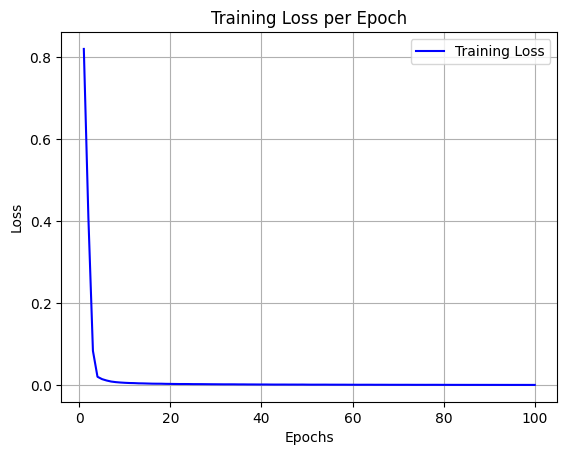

Mean Squared Error (MSE): 0.0033
Root Mean Squared Error (RMSE): 0.0574
R-Squared: 0.9969


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('secondhanddataset.csv')

X = data.drop(columns=['current price']).values
y = data['current price'].values.reshape(-1, 1)  # Bentuk y harus (n_samples, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalisasi target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Mengubah data menjadi tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# DataLoader untuk batch processing
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Membangun model MLP
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Lapisan pertama dengan 128 neuron
        self.fc2 = nn.Linear(128, 64)  # Lapisan kedua dengan 64 neuron
        self.fc3 = nn.Linear(64, 1)  # Lapisan output (tanpa aktivasi karena regresi)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Aktivasi ReLU untuk lapisan pertama
        x = torch.relu(self.fc2(x))  # Aktivasi ReLU untuk lapisan kedua
        x = self.fc3(x)  # Output tanpa aktivasi
        return x

# Inisialisasi model
model = MLP(input_dim=X_train.shape[1])

# Loss function dan optimizer
criterion = nn.MSELoss()  # Mean Squared Error (MSE) untuk regresi
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Optimizer Adam dengan learning rate kecil

# Training model
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()  # Mengaktifkan mode pelatihan
    epoch_loss = 0  # Menyimpan akumulasi loss per epoch

    for batch_X, batch_y in train_loader:  # Iterasi melalui batch dalam DataLoader
        optimizer.zero_grad()  # Reset gradien sebelum backpropagation
        outputs = model(batch_X)  # Prediksi dari model
        loss = criterion(outputs, batch_y)  # Hitung loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update bobot model
        epoch_loss += loss.item()  # Simpan total loss

    # Simpan nilai loss untuk plotting
    train_losses.append(epoch_loss / len(train_loader))

    # Tampilkan loss setiap 10 epoch
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}')

# Plot Training Loss
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', color='b')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi menggunakan MSE, RMSE, dan R-Squared
model.eval()  # Mengaktifkan mode evaluasi

# Prediksi pada data uji
with torch.no_grad():
    y_pred = model(X_test)

# Menghitung MSE, RMSE, dan R-Squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-Squared: {r2:.4f}')


**Evaluasi TensorFlow**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.7352 - val_loss: 0.1182
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0625 - val_loss: 0.0303
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0238 - val_loss: 0.0209
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - val_loss: 0.0155
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - val_loss: 0.0133
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076 - val_loss: 0.0119
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0062 - val_loss: 0.0105
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - val_loss: 0.0094
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0089
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - val_loss: 0.0083
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - val_loss: 0.0079
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


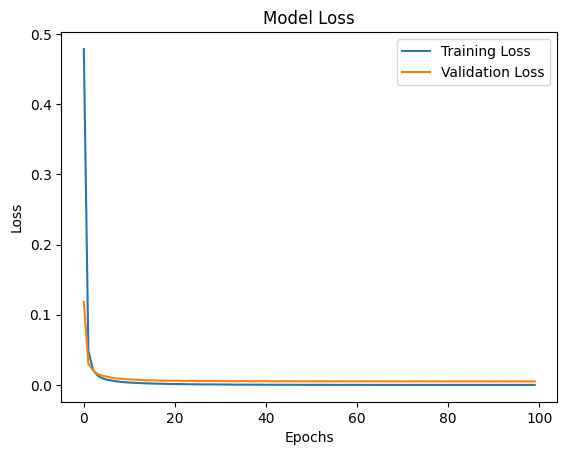

Mean Squared Error (MSE): 0.0050
Root Mean Squared Error (RMSE): 0.0708
R-Squared: 0.9953


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('secondhanddataset.csv')

# Fitur dan target
X = data.drop(columns=['current price']).values
y = data['current price'].values.reshape(-1, 1)  # Bentuk y harus (n_samples, 1)

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Membangun model MLP
model = models.Sequential()

# Lapisan pertama dengan 128 neuron
model.add(layers.Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Lapisan kedua dengan 64 neuron
model.add(layers.Dense(64, activation='relu'))

# Lapisan output dengan 1 neuron (regresi)
model.add(layers.Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluasi model
y_test_pred = model.predict(X_test)

# Menghitung MSE, RMSE, dan R-Squared
mse = np.mean((y_test_pred - y_test) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))


# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-Squared: {r2:.4f}')


**Persamaan Matematika** yang digunakan dalam proses pelatihan model **MLP** (Multilayer Perceptron) di kode PyTorch dan TensorFlow yang telah Anda gunakan.

Berikut adalah penjelasan untuk **persamaan matematika** yang terlibat dalam membangun dan melatih model **MLP**:

### 1. **Forward Pass:**

Pada **MLP (Multilayer Perceptron)**, setiap lapisan dapat dianggap sebagai persamaan matematis yang menghubungkan input dan outputnya. Dalam lapisan penuh (**fully connected layer**) seperti yang digunakan pada model Anda, persamaannya adalah:

#### Persamaan:
$$
\mathbf{y} = \sigma(\mathbf{W} \mathbf{x} + \mathbf{b})
$$
Di mana:
- $\mathbf{W}$ adalah matriks bobot (weights) yang menghubungkan input ke neuron di lapisan berikutnya.
- $\mathbf{x}$ adalah vektor input ke lapisan tersebut.
- $\mathbf{b}$ adalah vektor bias untuk lapisan tersebut.
- $\sigma$ adalah fungsi aktivasi (seperti ReLU atau sigmoid) yang digunakan untuk memperkenalkan non-linearitas dalam model.
- $\mathbf{y}$ adalah output dari lapisan tersebut.

Pada model Anda, setiap lapisan di MLP dapat dihitung dengan persamaan ini, dan fungsi aktivasi ReLU (Rectified Linear Unit) digunakan di lapisan tersembunyi.

#### ReLU (Rectified Linear Unit):
$$
\text{ReLU}(x) = \max(0, x)
$$
ReLU mengubah nilai negatif menjadi nol dan membiarkan nilai positif tetap seperti semula.

### 2. **Backpropagation (Proses Pelatihan):**

Setelah forward pass, kita menghitung loss atau kesalahan menggunakan **MSE (Mean Squared Error)** seperti yang telah dijelaskan sebelumnya. Tujuan dari **backpropagation** adalah untuk memperbarui bobot **\( \mathbf{W} \)** dan bias **\( \mathbf{b} \)** model agar model dapat meminimalkan kesalahan (loss).

#### Persamaan Error:
$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Di mana:
- $ y_i $ adalah nilai target yang sebenarnya (ground truth).
- $\hat{y}_i$ adalah prediksi model.


Kemudian, kita melakukan **backpropagation** untuk menghitung **gradien** dari loss terhadap bobot dan bias, dan mengupdate parameter-parameter ini dengan menggunakan **optimisasi** (seperti **Adam** atau **SGD**).

#### Gradien Descent:
Backpropagation menggunakan **gradient descent** untuk memperbarui bobot model berdasarkan gradien loss terhadap bobot.

Persamaan **Gradient Descent** adalah:
$$
\mathbf{W} := \mathbf{W} - \eta \frac{\partial \text{Loss}}{\partial \mathbf{W}}
$$
$$
\mathbf{b} := \mathbf{b} - \eta \frac{\partial \text{Loss}}{\partial \mathbf{b}}
$$
Di mana:
- $ \eta $ adalah **learning rate**, yang mengontrol seberapa besar langkah pembaruan bobot dan bias.
- $ \frac{\partial \text{Loss}}{\partial \mathbf{W}} $ dan $ \frac{\partial \text{Loss}}{\partial \mathbf{b}} $ adalah gradien loss terhadap bobot dan bias, dihitung melalui backpropagation.

#### Optimizer Adam:
Adam adalah **optimizer** yang menggabungkan **momentum** dan **RMSProp** untuk memperbarui parameter model. Persamaan pembaruan untuk Adam adalah sebagai berikut:

$$
\mathbf{W}_t = \mathbf{W}_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$
Di mana:
- $ \hat{m}_t $ adalah estimasi rata-rata gradien, dan
- $ \hat{v}_t $ adalah estimasi varians dari gradien.
- $ \epsilon $ adalah konstanta kecil yang digunakan untuk mencegah pembagian dengan nol.

### 3. **Evaluasi:**

Setelah pelatihan selesai, kita melakukan evaluasi pada data uji menggunakan metrik **MSE**, **RMSE**, dan **R-Squared**, yang sudah dibahas sebelumnya, untuk mengukur kinerja model.

#### Persamaan MSE dan RMSE:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
$$
RMSE = \sqrt{MSE}
$$

#### Persamaan R-Squared:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Di mana:
- $ \bar{y} $ adalah nilai rata-rata dari $ y_i $.

---

### Kesimpulan:
Berdasarkan penjelasan tentang persamaan matematika yang terlibat dalam membangun dan melatih model **MLP** (Multilayer Perceptron) di PyTorch dan TensorFlow dapat disimpulkan sebagai berikut:

1. **Proses Forward Pass**: Model MLP menghitung output dari setiap lapisan dengan menggunakan matriks bobot ($\mathbf{W}$), input ($\mathbf{x}$), bias ($\mathbf{b}$), dan fungsi aktivasi ($\sigma$), yang menghasilkan output lapisan ($\mathbf{y}$). Ini merupakan tahap utama di mana data melewati jaringan untuk menghasilkan prediksi.

2. **Backpropagation**: Setelah menghitung loss menggunakan fungsi **MSE** (Mean Squared Error), proses **backpropagation** digunakan untuk menghitung gradien dan memperbarui bobot serta bias model. Proses ini menggunakan algoritma **Gradient Descent** untuk meminimalkan kesalahan prediksi dengan memperbarui parameter model.

3. **Evaluasi Model**: Setelah pelatihan selesai, evaluasi dilakukan menggunakan metrik **MSE**, **RMSE**, dan **R-Squared** untuk mengukur seberapa baik model dalam memprediksi data uji. MSE dan RMSE mengukur besarnya kesalahan prediksi, sementara **R-Squared** menunjukkan sejauh mana model dapat menjelaskan variasi dalam data.

4. **Optimisasi**: Proses optimisasi menggunakan algoritma **Adam** dalam kedua implementasi PyTorch dan TensorFlow, yang membantu model untuk mengonvergensi secara efektif dengan memperbarui bobot model secara efisien.

Secara keseluruhan, metode ini memungkinkan kita untuk membangun model regresi yang kuat dengan jaringan saraf MLP, mengoptimalkan parameter melalui pelatihan iteratif, dan mengevaluasi kinerjanya dengan berbagai metrik.